# Extracted from the book Python for Data Analysis

## Jargon

### Munge/munging/wrangling
Describes the overall process of manipulating unstructured and/or messy data into a structured or clean form.

### Introspection
#### Using a question mark (?) before or after a variable will display some *general information* about the object.

In [4]:
b = [1, 2, 3]
b?

#### Using ? shows us the *docstring*

In [6]:
def add_numbers(a, b):
    """
    Add two numbers together
    
    Returns
    -------
    the sum : type of arguments
    """
    return a + b

add_numbers?

#### Using ?? will also show the function's *source code* if possible

In [7]:
add_numbers??

#### Using ? to *search the IPython namespace*in a manner similar to the standard Unix or Windows command line

In [9]:
import numpy as np
np.*load*?

#### %run 

In [9]:
%run load_command_test.py

0


#### %load => load code from a script into the cell, and automatically comment %load

In [4]:
# %load load_command_test.py
def simple(x, y, z):
    return x+y-z


result = simple(1, 2, 3)
print(result)


0


In [12]:
%cpaste

UsageError: Line magic function `%cpaste` not found.


### Magic commands
#### A magic command is any command prefixed by the percent symbol %.

In [13]:
import numpy as np
a = np.random.randn(100, 100)

In [14]:
%timeit np.dot(a, a)

74.1 µs ± 397 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Debug!!

In [9]:
%debug?

In [1]:
def func1(a, b):
    return a / b

def func2(x):
    return func1(x, x-1)

In [3]:
%debug
func2(1)

> <ipython-input-1-178d579b6884>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     return func1(x, x-1)

ipdb> a
a = 1
b = 0
ipdb> print(a)
1
ipdb> quit()


ZeroDivisionError: division by zero

### When the code is not complicated, use -* %xmode Verbose *

In [3]:
%xmode Verbose

Exception reporting mode: Verbose


### When reading tracetrack is not enough, use - %pdb on

In [4]:
%xmode Plain
%pdb on

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


In [5]:
func2(1)

ZeroDivisionError: division by zero

> <ipython-input-1-178d579b6884>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     return func1(x, x-1)

ipdb> print(a)
1
ipdb> print(b)
0
ipdb> quit


### %matplotlib inline - creat multiple plot windows without interfering with the console session

In [4]:
%matplotlib inline

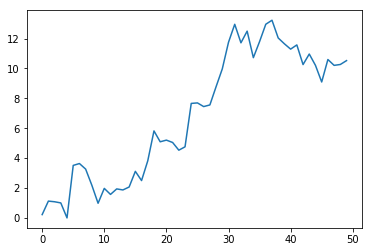

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.random.randn(50).cumsum())

## Python Basic features

### Duck typing

In [7]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError: # not iterable
        return False

In [8]:
isiterable('sswwwxxc')

True

In [10]:
isiterable(1)

False

### Convert an iterator to a list

In [12]:
x = (1, 2, 3)
if not isinstance(x, list) and isiterable(x):
    x = list(x)

x

[1, 2, 3]

## Scalar types

### floor division //

In [13]:
3 // 2

1

### String.count

In [14]:
c = """
This is a longer string that 
spans multiple lines
"""

In [18]:
c.count('\n')

3

### Python strings are immutable

In [19]:
a = 'this is immutable'

In [20]:
a[4] = 'a'

TypeError: 'str' object does not support item assignment

### Convert a string to a list

In [21]:
list(a)

['t',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'i',
 'm',
 'm',
 'u',
 't',
 'a',
 'b',
 'l',
 'e']

### The backslash character \ is an escape character. Used to specify special characters like newline \n or Unicode characters. To write a string literal with backslashes, you need to escape them:
** (important when cleasing data) **

In [25]:
s = '12\\34'

In [26]:
print(s)

12\34


In [27]:
s = r'this\has\no\special\characters'

In [28]:
s

'this\\has\\no\\special\\characters'

### Concatenate strings

In [32]:
a = 'this is the first half '

In [30]:
b = 'and this is the second half'

In [33]:
a + b

'this is the first half and this is the second half'

### String templating / formatting

In [35]:
template = '{0:.2f} {1:s} are worth US${2:d}'

In [36]:
template.format(4.5660, 'Argentine Pesos', 1)

'4.57 Argentine Pesos are worth US$1'

### Bytes and Unicode
In Python 3.0 and up, Unicode has become the first-class string type to enable more consistent handling of ASCII and non-ASCII text.

In old Python, strings were all bytes without any explicit Unicode encoding.

In [37]:
val = 'español'

In [38]:
val

'español'

In [39]:
val_utf8 = val.encode('utf-8')

In [40]:
val_utf8

b'espan\xcc\x83ol'

In [41]:
type(val_utf8)

bytes

In [42]:
val_utf8.decode('utf-8')

'español'

In [47]:
val.encode('utf-16')

b'\xff\xfee\x00s\x00p\x00a\x00n\x00\x03\x03o\x00l\x00'

In [48]:
val.encode('utf-16le')

b'e\x00s\x00p\x00a\x00n\x00\x03\x03o\x00l\x00'

### Dates and times

In [49]:
from datetime import datetime, date, time

In [61]:
dt = datetime(2018, 5, 24, 20, 30, 21)

In [62]:
dt.day

24

In [63]:
dt.minute

30

In [64]:
dt.date()

datetime.date(2018, 5, 24)

In [65]:
dt.time()

datetime.time(20, 30, 21)

In [67]:
# %m - month , %M - Minute
# str f(ormats) time
dt.strftime('%m/%d/%Y %H:%M')

'05/24/2018 20:30'

In [69]:
# str p(arse) time
datetime.strptime('20180524', '%Y%m%d')

datetime.datetime(2018, 5, 24, 0, 0)

#### Since datetime.datetime is an immutable type, methods always produce new objects.

In [70]:
dt2 = datetime(2011, 11, 15, 22, 30)

In [71]:
delta = dt - dt2

In [72]:
delta

datetime.timedelta(2381, 79221)

#### Ternary expressions can condense the code, but may sacrifice readability if the conditions as well as the true and false expression are very complex.

In [73]:
x = 5

In [75]:
'non-negative' if x > 0 else 'negative'

'non-negative'

## Tuples

### Use * to capature an abitrarily long list of positional arguments 

In [77]:
values = 1, 2, 3, 4, 5
a, b, *rest = values

In [79]:
a, b

(1, 2)

In [80]:
rest

[3, 4, 5]

### Discard unwanted values using _

In [81]:
a, b, *_ = values

In [82]:
a, b

(1, 2)

## Lists

In [105]:
a_list = list(range(10))
a_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### list.insert is computationaly expensive compared with append
operations based on **indices**
    1. insert
    2. pop

In [106]:
a_list.insert(1, 'aa')
a_list

[0, 'aa', 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [107]:
a_list.pop(5)
a_list

[0, 'aa', 1, 2, 3, 5, 6, 7, 8, 9]

operations baesd on **objects**
    1. append
    2. remove - remove the first 

In [108]:
a_list.append('aa')
a_list

[0, 'aa', 1, 2, 3, 5, 6, 7, 8, 9, 'aa']

In [109]:
a_list.remove('aa')
a_list

[0, 1, 2, 3, 5, 6, 7, 8, 9, 'aa']

## Using *extend* to append elements to an exisiting list. + is computationally expensive, involving creating a new list, and copying.

In [110]:
a_list.extend([7, 8, (2, 3)])

In [111]:
a_list

[0, 1, 2, 3, 5, 6, 7, 8, 9, 'aa', 7, 8, (2, 3)]

## Sort a list in-place

In [112]:
a = [7, 2, 5, 1, 3]

In [114]:
a.sort()
a

[1, 2, 3, 5, 7]

## Sort by key

In [115]:
b = ['saw', 'small', 'He', 'foxes', 'six']
b.sort(key=len)
b

['He', 'saw', 'six', 'small', 'foxes']

## Sorted() returns a new sorted list from any sequence

In [116]:
sorted([7, 2, 5, 1, 3])

[1, 2, 3, 5, 7]

In [117]:
sorted((6,5,9,4,2))

[2, 4, 5, 6, 9]

In [118]:
sorted('horse race')

[' ', 'a', 'c', 'e', 'e', 'h', 'o', 'r', 'r', 's']

## Zip => pairs up the elements of sequences to create a list of *tuple*

In [119]:
seq1 = ['one', 'two', 'three']
seq2 = ['foo', 'bar', 'baz']
for i, (a, b) in enumerate(zip(seq1, seq2)):
    print('{0}: {1}, {2}'.format(i, a, b))

0: one, foo
1: two, bar
2: three, baz


## Using zip to convert  a list of rows into a list of columns

In [120]:
pitcher = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Schilling', 'Curt'),]

In [121]:
first_names, last_names = zip(*pitcher)

In [122]:
first_names

('Nolan', 'Roger', 'Schilling')

In [123]:
last_names

('Ryan', 'Clemens', 'Curt')

## Reversed() to reverse the elements of a sequence

In [124]:
list(reversed(range(10)))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]